#Mendez Diaz Jahzeel Ulises
#Práctica 5
#Prediccion de CO2(tCO2) con Potencia Reactiva Retrasada y Uso electricidad kWh.
Dataset: Steel Industry Energy Consumption
https://archive.ics.uci.edu/dataset/851/steel+industry+energy+consumption

La información recopilada en el dataser proviene de DAEWOO Steel Co. Ltd en Gwangyang, Corea del Sur. Produce varios tipos de bobinas, placas de acero y placas de hierro.

El dataset contiene los siguientes campos:
  * date
  * Usage_kWh
  * Lagging_Current_Reactive.Power_kVarh
  * Leading_Current_Reactive_Power_kVarh
  * CO2(tCO2)
  * Lagging_Current_Power_Factor
  * Leading_Current_Power_Factor
  * NSM	Feature
  * WeekStatus
  * Day_of_week

Nosotros nos concentraremos en utilizar a  Usage_kWh y Lagging_Current_Reactive.Power_kVarh para intentar predecir a CO2(tCO2) con un modelo de regresión lineal multivariada.

In [ ]:
#Primero importaremos las librerias que ocuparemos a lo largo del notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

In [ ]:
#Cargamos el dataset con ayuda de Pandas
data = pd.read_csv('Steel_industry_data.csv')

En esta parte realizaremos un analisis exploratorio del dataset.





Revisamos los tipos de datos que vienen en el dataset.

In [ ]:
data.dtypes

date                                     object
Usage_kWh                               float64
Lagging_Current_Reactive.Power_kVarh    float64
Leading_Current_Reactive_Power_kVarh    float64
CO2(tCO2)                               float64
Lagging_Current_Power_Factor            float64
Leading_Current_Power_Factor            float64
NSM                                       int64
WeekStatus                               object
Day_of_week                              object
Load_Type                                object
dtype: object

In [ ]:
data.sample(10)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
8791,02/04/2018 14:00,57.35,28.91,0.00,0.03,89.30,100.00,50400,Weekday,Monday,Maximum_Load
28724,27/10/2018 05:15,3.64,6.01,0.00,0.00,51.80,100.00,18900,Weekend,Saturday,Light_Load
18948,17/07/2018 09:15,58.64,44.46,0.00,0.03,79.69,100.00,33300,Weekday,Tuesday,Medium_Load
27508,14/10/2018 13:15,3.06,0.00,10.73,0.00,100.00,27.42,47700,Weekend,Sunday,Light_Load
16527,22/06/2018 04:00,3.42,5.40,0.00,0.00,53.51,100.00,14400,Weekday,Friday,Light_Load
15132,07/06/2018 15:15,106.27,49.86,0.00,0.05,90.53,100.00,54900,Weekday,Thursday,Maximum_Load
15427,10/06/2018 17:00,3.20,0.00,17.06,0.00,100.00,18.44,61200,Weekend,Sunday,Light_Load
738,08/01/2018 16:45,136.98,53.93,0.00,0.06,93.05,100.00,60300,Weekday,Monday,Medium_Load
23369,01/09/2018 10:30,38.88,11.59,0.00,0.02,95.83,100.00,37800,Weekend,Saturday,Maximum_Load
33643,17/12/2018 11:00,53.78,18.07,0.00,0.02,94.79,100.00,39600,Weekday,Monday,Maximum_Load


Observamos valores 0 en algunos campos, posiblemente valores faltantes.

Observamos las métricas estadisticas del dataset.

In [ ]:
data.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


Observamos que el cuartil 2 de CO2(tC02) es 0, lo que implica que al menos la mitad del dataset tiene valores faltantes en ese campo.

Realizaremos un diagrama de dispersión de los datos.

Text(0.5, 0, 'CO2(tCO2)')

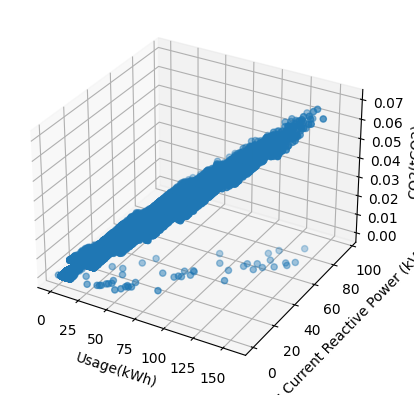

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(data['Usage_kWh'],data['Lagging_Current_Reactive.Power_kVarh'],data['CO2(tCO2)'])
ax.set_xlabel('Usage(kWh)')
ax.set_ylabel('Lagging Current Reactive Power (kVarh)')
ax.set_zlabel('CO2(tCO2)')

Por medio del diagrama de puntos observamos un posible correlacion lineal.

#Preprocesamiento

En este caso optare por imputar los datos, esto para no perder datos que podrian resultar valiosos, utilizaré el imputador de sklearn llamado KNNImputer.

Este imputador utiliza el algoritmo de k-Nearest Neighbors para imputar, los valores son imputados usando la media de los n_neighbors más cercanos.
Para imputar los datos usaré el dataset completo, y asi mantener una consistencia con los datos. Esto se hara unicamente con los valores númericos.

In [ ]:
#Seleccionamos las celdas a imputar
imputed_data = data[['Usage_kWh','Lagging_Current_Reactive.Power_kVarh','Leading_Current_Reactive_Power_kVarh','CO2(tCO2)','Lagging_Current_Power_Factor','Leading_Current_Power_Factor','NSM']].copy()
#Remplazamos los 0 por NaN de numpy
imputed_data = imputed_data.replace(0,np.nan)

#Inicializamos el imputador e imputamos datos
imputer = KNNImputer(n_neighbors=3)
imputed_data = imputer.fit_transform(imputed_data)

In [ ]:
data_imputed = data.copy()
data_imputed[['Usage_kWh','Lagging_Current_Reactive.Power_kVarh','Leading_Current_Reactive_Power_kVarh','CO2(tCO2)','Lagging_Current_Power_Factor','Leading_Current_Power_Factor','NSM']]= imputed_data
#Revisamos que la imputacion sea correcta
data_imputed

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.04,0.01,73.21,100.00,900.0,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.04,0.01,66.77,100.00,1800.0,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.04,0.01,70.28,100.00,2700.0,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.04,0.01,68.09,100.00,3600.0,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.04,0.01,64.72,100.00,4500.0,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.04,0.01,62.10,100.00,82800.0,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.04,0.01,70.71,100.00,83700.0,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.01,76.62,99.98,84600.0,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.01,77.72,99.96,85500.0,Weekday,Monday,Light_Load


Re-graficamos el diagrama de dispersión.

Text(0.5, 0, 'CO2(tCO2)')

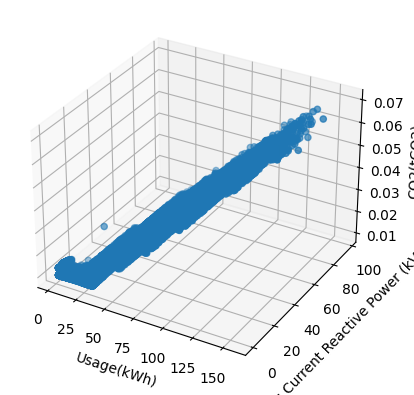

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(data_imputed['Usage_kWh'],data_imputed['Lagging_Current_Reactive.Power_kVarh'],data_imputed['CO2(tCO2)'])
ax.set_xlabel('Usage(kWh)')
ax.set_ylabel('Lagging Current Reactive Power (kVarh)')
ax.set_zlabel('CO2(tCO2)')

Imputacion completada :)

#Regresión lineal multivariada

Declararemos y definiremos las funciones de normalizacion, costo y gradiente descendente necesarias para hacer la regresión.

In [ ]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = X_norm - mu
    X_norm = X_norm / sigma
    return X_norm, mu, sigma

In [ ]:
def computeCostMulti(X, y, theta):
    m = y.shape[0]
    J = 0.0
    J = 1./(2. * m) * np.sum((np.dot(X, theta) - y)**2)
    return J

In [ ]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []
    for i in range(num_iters):
        theta = theta - (alpha/m) * np.dot(X.T, (np.dot(X, theta) - y))
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

Una vez definidas y declaradas las funciones necesarias, prepararemos los datos para aplicar la regresión.

In [ ]:
#Extraemos los datos del dataset como un ndarray de numpy
data_regresion = data_imputed[['Usage_kWh','Lagging_Current_Reactive.Power_kVarh','CO2(tCO2)']].copy()
data_regresion = data_regresion[['Usage_kWh','Lagging_Current_Reactive.Power_kVarh','CO2(tCO2)']].values

#Extraemos los valores de X,Y y Z
X = data_regresion[:, 0:2]
y = data_regresion[:, 2]
m = y.size

#Transformamos la forma de la matriz
y = y.reshape((m, 1))

Una vez preparados los datos procederemos a la normalización.

In [ ]:
#Se normalizacn los datos con la funcion de normalizacion.
X_norm, mu, sigma = featureNormalize(X)
print("Las medias son: ",mu)
print("Las desviaciones estandar son:", sigma)

Las medias son:  [27.38767402 13.13787632]
Las desviaciones estandar son: [33.44358244 16.22791699]


Ahora añadiremos los interceptos a X

In [ ]:
#Añadimos los interceptos y la normalizacion a X
X = np.concatenate([np.ones((m, 1)), X_norm], axis = 1)

Realizado eso podemos pasar a realizar las pruebas de la regresion en sí.

##Pruebas de numero de iteraciones y valor alpha

Iniciare probando **alpha = 0.01** con un numero de iteraciones igual a 1500

In [ ]:
alpha = 0.01
num_iters = 1500
theta = np.zeros((3, 1))
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)
theta1 = theta.copy()
print("Los valores de theta son: ",theta)

Los valores de theta son:  [[0.01781826]
 [0.00977794]
 [0.00195354]]


Graficaremos el costo y el numero de iteraciones para observar si converge.

Text(0, 0.5, 'Costo')

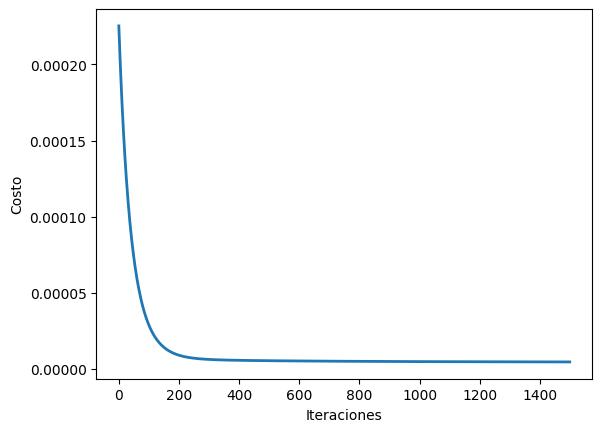

In [ ]:
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Iteraciones')
plt.ylabel('Costo')

Observamos que el costo no cambia practicamente nada a partir de la iteracion 200 +- 10, y si converge a un valor. Revisaremos con valore alpha mas altos.

Prueba **alpha = 0.3**

In [ ]:
alpha = 0.3
num_iters = 1500
theta = np.zeros((3, 1))
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)
theta2 = theta.copy()
print("Los valores de theta son: ",theta)

Los valores de theta son:  [[0.01781827]
 [0.01082701]
 [0.00090447]]


Text(0, 0.5, 'Costo')

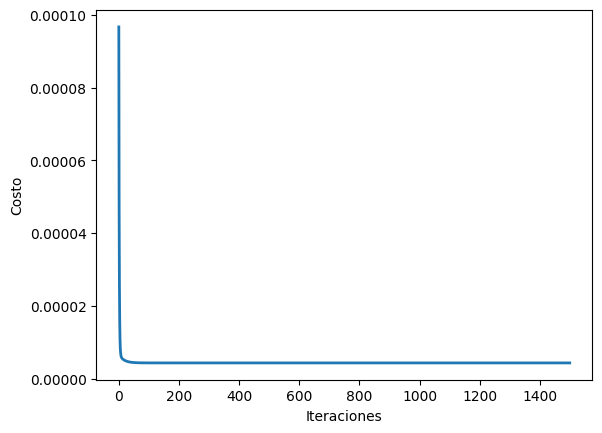

In [ ]:
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Iteraciones')
plt.ylabel('Costo')

Observamos un cambio dramatico en el numero de iteracion para la convergencia, aunque observamos que los valores alpha cambian significativamente.

Prueba **alpha = 0.0001**

In [ ]:
alpha = 0.0001
num_iters = 1500
theta = np.zeros((3, 1))
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)
theta3 = theta.copy()
print("Los valores de theta son: ",theta)

Los valores de theta son:  [[0.00248206]
 [0.00152885]
 [0.00137595]]


Text(0, 0.5, 'Costo')

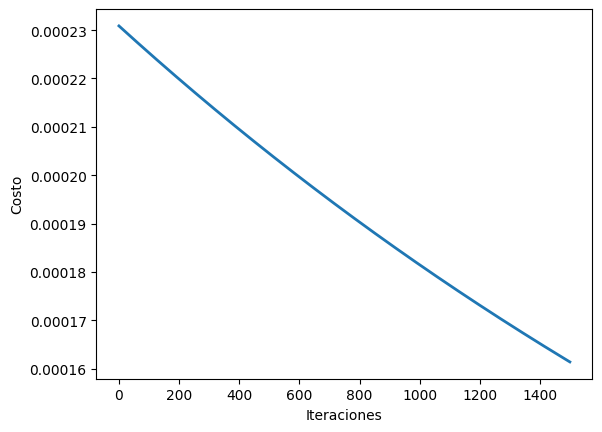

In [ ]:
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Iteraciones')
plt.ylabel('Costo')

Observamos que con un valor mas pequeño de alpha la convergencia tarda muchisimo, casi las 1400 iteraciones, y llega a un valor similar de theta con alpha = 0.01

Prueba **alpha = 0.7**

In [ ]:
alpha = 0.7
num_iters = 1500
theta = np.zeros((3, 1))
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)
theta4 = theta.copy()
print("Los valores de theta son: ",theta)

Los valores de theta son:  [[0.01781827]
 [0.01082701]
 [0.00090447]]


Text(0, 0.5, 'Costo')

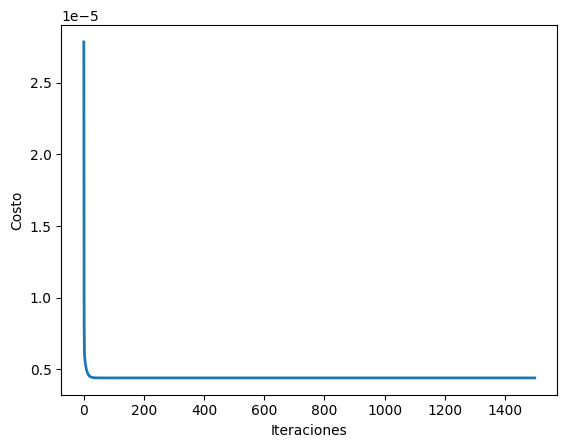

In [ ]:
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Iteraciones')
plt.ylabel('Costo')

Observamos igual una convergencia rapida, y un valor de theta aproximado al de **alpha = 0.3**

##Error medio absoluto

Definiremos una función para calcular el error medio absoluto y comparar a las tres alphas.

In [ ]:
def meanAbsoluteError(X, y, theta):
  m = y.shape[0]
  J = 0.0
  J = 1./(m) * np.sum(np.absolute((np.dot(X, theta) - y)))
  return J

Calcularemos y graficaremos los errores medios absolutos de las pruebas que realizamos.

In [ ]:
#Calculamos el error medio absoluto para las thetas.
mean_abs_error1 = meanAbsoluteError(X,y,theta1)
print("Error alpha = 0.01, iteraciones = 1500: ",mean_abs_error1)
mean_abs_error2 = meanAbsoluteError(X,y,theta2)
print("Error alpha = 0.3, iteraciones = 1500: ",mean_abs_error2)
mean_abs_error3 = meanAbsoluteError(X,y,theta3)
print("Error alpha = 0.0001, iteraciones = 1500: ",mean_abs_error3)
mean_abs_error4 = meanAbsoluteError(X,y,theta4)
print("Error alpha = 0.7, iteraciones = 1500: ",mean_abs_error4)


Error alpha = 0.01, iteraciones = 1500:  0.0019417375932008914
Error alpha = 0.3, iteraciones = 1500:  0.001953021269341001
Error alpha = 0.0001, iteraciones = 1500:  0.015336209468385625
Error alpha = 0.7, iteraciones = 1500:  0.0019530212693410001


<BarContainer object of 4 artists>

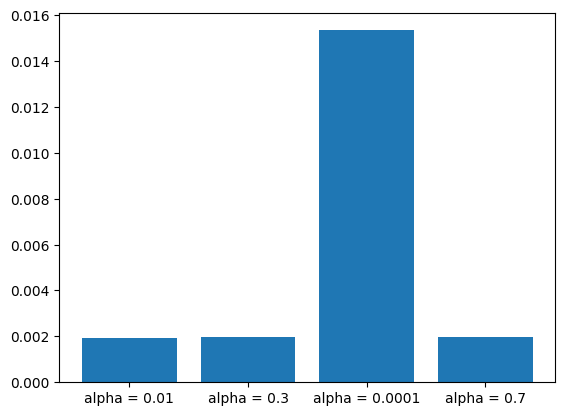

In [ ]:
labels = ["alpha = 0.01", "alpha = 0.3","alpha = 0.0001","alpha = 0.7"]
values = [mean_abs_error1,mean_abs_error2,mean_abs_error3,mean_abs_error4]

#Usamos una grafica de barras para observar la diferencia de manera visual
fig, ax = plt.subplots()
ax.bar(x = labels, height = values)

En este caso observamos que el menor el el alpha = 0.01 con 1500 iteraciones, considero que el alpha=0.0001 pudo tener mejores resultados si hubieramos aumentado el numero de iteraciones. En este caso me quedaria con alpha 0.01 y 1500 iteraciones.

###Comparativa con sklearn

Para hacer mas interesante la practica comparare el modelo de regresion hecho "a mano" con el modelo que nos ofrece sklearn, utilizaremos la metrica del error medio absoluto para comparar.

In [ ]:
#Primero importamos las librerias necesarias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

Ahora vamos a extraer los datos de data_imputed y los separaremos en un conjunto de entrenamiento y un conjunto de prueba, la proporción sera de 70/30.

In [ ]:
X_sklearn = data_imputed[['Usage_kWh','Lagging_Current_Reactive.Power_kVarh']]
Y_sklearn = data_imputed['CO2(tCO2)']
X_train, X_test, y_train, y_test = train_test_split(
    X_sklearn, Y_sklearn, test_size=0.3, random_state=101)

Ahora instanciaremos al modelo y lo entrenaremos, esto con la funcion fit.

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Ahora realizaremos las predicciones del conjunto de prueba y revisaremos el error medio absoluto

In [ ]:
predictions = model.predict(X_test)
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_absolute_error :  0.0019374293018332136


Graficaremos ambos errores y observaremos cual es menor.

<BarContainer object of 5 artists>

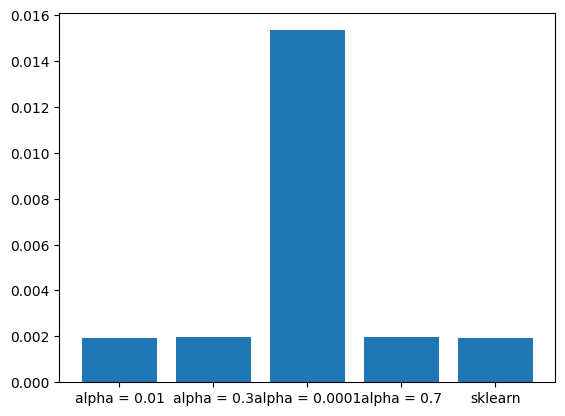

In [ ]:
labels_s = ["alpha = 0.01", "alpha = 0.3","alpha = 0.0001","alpha = 0.7","sklearn"]
values_s = [mean_abs_error1,mean_abs_error2,mean_abs_error3,mean_abs_error4,mean_absolute_error(y_test, predictions)]

#Usamos una grafica de barras para observar la diferencia de manera visual
fig, ax = plt.subplots()
ax.bar(x = labels_s, height = values_s)

Observamos que el error cuadratico medio es practicamente los mismo que con nuestro modelo.

##Predicciones

Realizaremos algunas predicciones y observaremos los valores.


In [ ]:
#Empezaremos con nuestro mejor modelo, valores Usage_kWh = 79.52 Lagging_Current_Reactive.Power_kVarh = 19.48
c02 = np.dot([1.0,(79.52	 - mu[0])/sigma[0], (19.48 - mu[1]) / sigma[1]], theta1)
print("El valor de C02(tCO2) seria aproximadamente: ",c02[0])

El valor de C02(tCO2) seria aproximadamente:  0.033823727154593045


In [ ]:
#Ahora lo haremos con sklearn
c02_s = model.predict([[79.52,19.48]])
print("El valor de C02(tCO2) seria aproximadamente: ",c02_s[0])

El valor de C02(tCO2) seria aproximadamente:  0.035057913913695


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Observamos predicciones similares.